In [2]:
#California Housing Dataset Program

In [24]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# ----- STEP 1: Load the California Housing dataset -----
housing = fetch_california_housing()

In [30]:
# ----- STEP 2: Convert it to a DataFrame -----
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target  # Add the target variable (median house value)

In [32]:
# ----- STEP 3: Explore the data -----
print(df.head())  # View the first few rows
print(df.info())  # Check column types and non-null counts
print(df.describe())  # Summary stats

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

In [34]:
# ----- STEP 4: Check for missing values -----
print(df.isnull().sum())  # No missing values expected

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


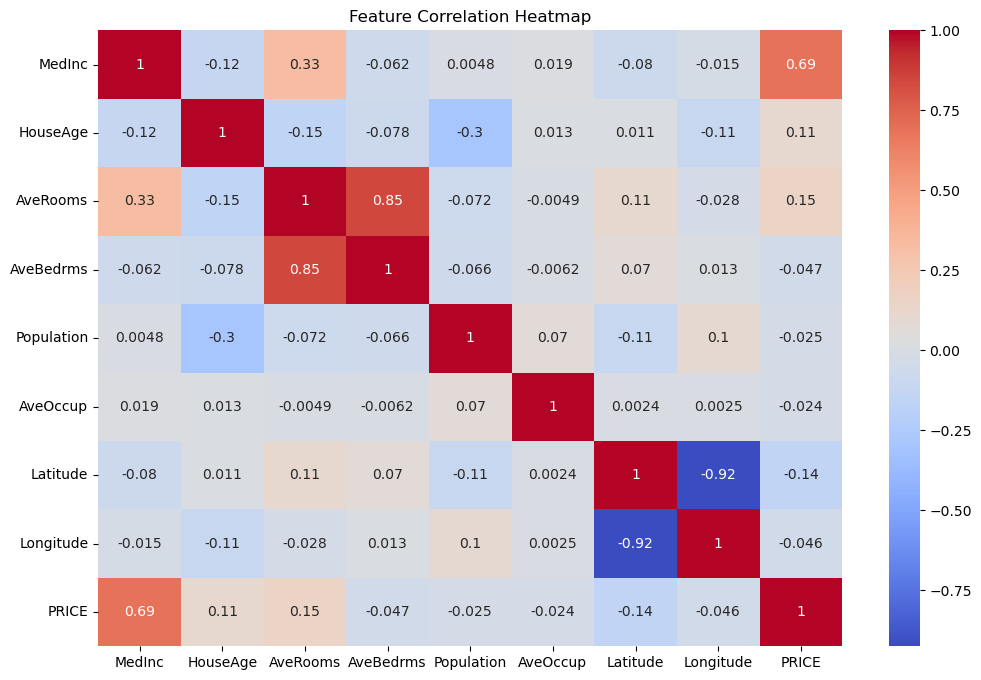

In [36]:
# ----- STEP 5: Visualize feature correlations -----
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

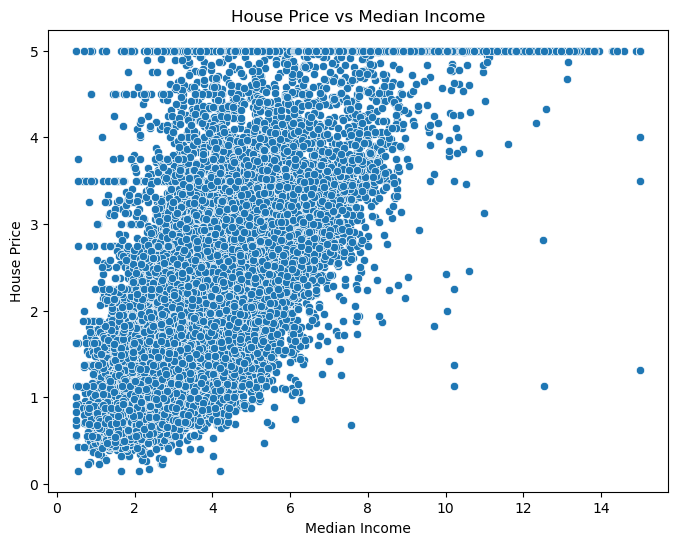

In [38]:
# Optional: visualize a feature vs price (e.g., Median Income)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['MedInc'], y=df['PRICE'])
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("House Price vs Median Income")
plt.show()

In [18]:
# ----- STEP 6: Split into features (X) and target (y) -----
X = df.drop('PRICE', axis=1)  # All features
y = df['PRICE']               # Target

In [40]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- STEP 7: Train the Linear Regression Model -----
model = LinearRegression()
model.fit(X_train, y_train)

# ----- STEP 8: Make Predictions -----
y_pred = model.predict(X_test)

# ----- STEP 9: Evaluate the Model -----
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.56
R² Score: 0.58


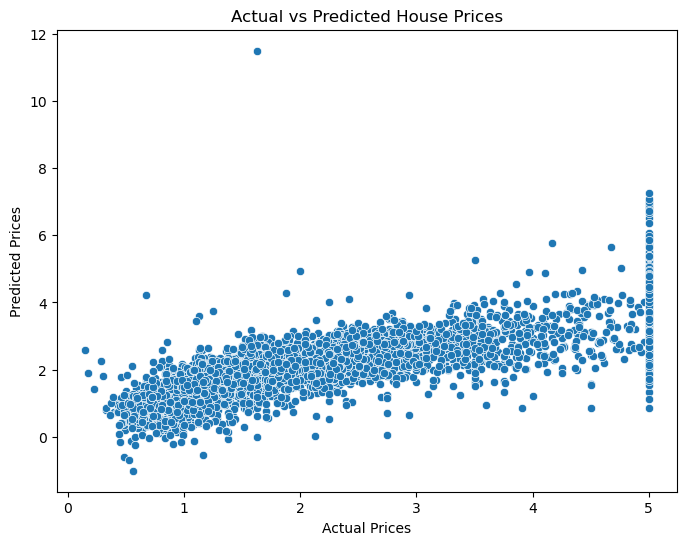

In [22]:
# ----- STEP 10: Visualize Actual vs Predicted Prices -----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()